In [1]:
#!pip install pandas
# !conda install seaborn

In [1]:
import re
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
# Load Necessary Data: reviews
reviews_df = pd.read_csv("./Data/reviews.csv", encoding="utf-8")
reviews_df.columns = ['home_id', 'review_id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
reviews_df.dropna()
reviews_df.head(5)

,home_id,review_id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [3]:
# Load Necessary Data: homes(select needed data columns)
fields = ['id', 'price', 'number_of_reviews',
          'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
          'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
          'review_scores_value', 'property_type', 'room_type']
homes_df = pd.read_csv("./Data/listings.csv", encoding = "utf-8", usecols = fields)
homes_df.columns = ['home_id', 'property_type', 'room_type', 'price',
                    'number_of_reviews', 'scores_overall_rating', 'scores_accuracy',
                    'scores_cleanliness', 'scores_checkin', 'scores_communication',
                    'scores_location', 'scores_value']
homes_df = homes_df.dropna() # removed 660 homes which are lack of some score information
homes_df.head(3)

,home_id,property_type,room_type,price,number_of_reviews,scores_overall_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value
0,241032,Apartment,Entire home/apt,$85.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Apartment,Entire home/apt,$150.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,House,Entire home/apt,$975.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0


In [4]:
home_price_count =  homes_df['price'].value_counts()
home_price_count.head()

$150.00    128
$100.00    111
$75.00      99
$95.00      95
$125.00     89
Name: price, dtype: int64

In [5]:
def extract_price(s):
    return int(''.join(re.findall(r"\d+", s.split('.')[0])))

home_price_count.index = [extract_price(p) for p in home_price_count.index]
home_price_count_df = DataFrame(home_price_count.values, 
                                index = home_price_count.index, 
                                columns = ['sum_price_count'])
home_price_count_df.index.names = ['$price']
home_price_count_df.head()

,sum_price_count
$price,
150,128
100,111
75,99
95,95
125,89


In [6]:
def price_dtrb_area_plot(df):
    prices = df.index
    counts = df.sum_price_count

    # plt.fill_between(prices, counts, color="skyblue", alpha=0.8)
    # plt.plot(prices, counts, color="Slateblue", alpha=1)


    # Make the same graph
    plt.fill_between(prices, counts, color="skyblue", alpha=0.4)
    # plt.plot(prices, counts, color="Slateblue")

    # Add titles
    plt.title("Airbnb Homes Price Distribution Chart", loc="center")
    plt.xlabel("$ Price")
    plt.ylabel("Count of Price")
    plt.grid(True)

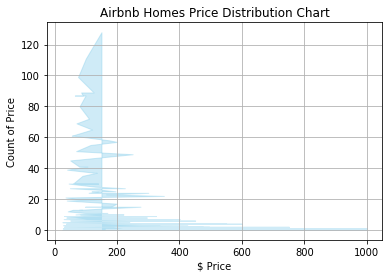

In [7]:
price_dtrb_area_plot(home_price_count_df)

### The distribution chart is so strange, I choose to segment the prices into several price range.
### First, I tried the `$25` as price range.

In [8]:
binedges = np.arange(0, 1000, 25)
binlabels = np.arange(25, 1000, 25)

# group the prices by 50 range
tmp = home_price_count_df.groupby(pd.cut(home_price_count_df.index,
                                          bins = binedges,
                                          labels = binlabels)
                                  ).sum_price_count.sum()

tmp_df = tmp.to_frame()
tmp_df.index.names = ['price_range']

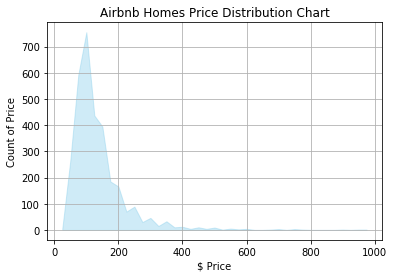

In [9]:
price_dtrb_area_plot(tmp_df)

### From above area chart, I choose to see the range from `$0` to `$400` to see detailed distribution. The homes out of this range will not be considered in my research. 

### Then, I chose to use the reduced dataset, airbnb homes with price in  `$0 - $400`, to plot the distribution char using `$10` as price range.

In [10]:
binedges = np.arange(0, 400, 10)
binlabels = np.arange(10, 400, 10)
# temp = home_price_count_df
# max(home_price_count_df.index)
# print(len(binedges))
# print(len(binlabels))

# group the prices by 10 range
tmp = home_price_count_df.groupby(pd.cut(home_price_count_df.index,
                                          bins = binedges,
                                          labels = binlabels)
                                  ).sum_price_count.sum()

tmp_df = tmp.to_frame()
tmp_df.index.names = ['price_range']

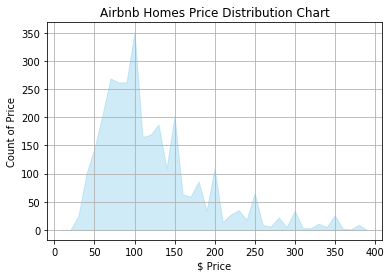

In [11]:
price_dtrb_area_plot(tmp_df)

#### This chart becomes clearer of the distribution. 
### For this phase of my paper, I choose only select the homes with price from `$80` to `$110` to practice my model. 

In [12]:
homes_df.head()

,home_id,property_type,room_type,price,number_of_reviews,scores_overall_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value
0,241032,Apartment,Entire home/apt,$85.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,953595,Apartment,Entire home/apt,$150.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3308979,House,Entire home/apt,$975.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0
4,278830,House,Entire home/apt,$450.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0
5,5956968,House,Private room,$120.00,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0


In [13]:
# Select all Airbnb homes with price in 50 - 150
# data_sample1_df = homes_df[homes_df.price_int]
homes_df['price_int'] = [extract_price(p) for p in homes_df.price]

In [14]:
data_sample1_df = homes_df[homes_df['price_int'] >= 50]
data_sample1_df = data_sample1_df[data_sample1_df['price_int'] <= 150]
data_sample1_df.head(3)

,home_id,property_type,room_type,price,number_of_reviews,scores_overall_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,price_int
0,241032,Apartment,Entire home/apt,$85.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85
1,953595,Apartment,Entire home/apt,$150.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150
5,5956968,House,Private room,$120.00,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,120


### Observe those 858 homes.

#### See the counts of different scores for each feature.

In [15]:
# scores_accuracy
# scores_cleanliness
# scores_checkin
# scores_communication
# scores_location
# scores_value
scores_accuracy = data_sample1_df.groupby('scores_accuracy')['home_id'].nunique()
scores_cleanliness = data_sample1_df.groupby('scores_cleanliness')['home_id'].nunique()
scores_checkin = data_sample1_df.groupby('scores_checkin')['home_id'].nunique()
scores_communication = data_sample1_df.groupby('scores_communication')['home_id'].nunique()
scores_location = data_sample1_df.groupby('scores_location')['home_id'].nunique()
scores_value = data_sample1_df.groupby('scores_value')['home_id'].nunique()

In [16]:
print('*' * 40)
print(scores_accuracy)
print('\n' + '*' * 40)
print(scores_cleanliness)
print('\n' + '*' * 40)
print(scores_checkin)
print('\n' + '*' * 40)
print(scores_communication)
print('\n' + '*' * 40)
print(scores_location)
print('\n' + '*' * 40)
print(scores_value)

****************************************
scores_accuracy
2.0        2
4.0        2
6.0       14
7.0        9
8.0       80
9.0      501
10.0    1617
Name: home_id, dtype: int64

****************************************
scores_cleanliness
3.0        1
4.0        4
5.0        3
6.0       23
7.0       20
8.0      113
9.0      512
10.0    1549
Name: home_id, dtype: int64

****************************************
scores_checkin
2.0        2
4.0        2
6.0        6
7.0       10
8.0       41
9.0      293
10.0    1871
Name: home_id, dtype: int64

****************************************
scores_communication
2.0        3
4.0        2
5.0        1
6.0        3
7.0        6
8.0       38
9.0      259
10.0    1913
Name: home_id, dtype: int64

****************************************
scores_location
4.0        1
6.0        4
7.0       15
8.0       90
9.0      634
10.0    1481
Name: home_id, dtype: int64

****************************************
scores_value
2.0        1
4.0        3
5.0        1
6.

In [17]:
print(
    'Maximum review number: ' +
    str(max(data_sample1_df["number_of_reviews"])) +
    '\nMinimum review number: ' +
    str(min(data_sample1_df["number_of_reviews"]))
)

# data_sample1_df.groupby(
#     pd.cut(data_sample1_df["number_of_reviews"],
#            np.arange(0, 500, 20))
# ).sum()

tmp1_df = data_sample1_df.groupby(
            pd.cut(data_sample1_df["number_of_reviews"],
                   np.arange(0, 500, 20))
          )['home_id'].nunique().to_frame()

# sample1_info_df.columns = ['number of homes']
# sample1_info_df

tmp2_df = data_sample1_df.groupby(
            pd.cut(data_sample1_df["number_of_reviews"],
                   np.arange(0, 500, 20))
          )['number_of_reviews'].sum().to_frame()

sample1_info_df = pd.concat([tmp1_df, tmp2_df], axis=1)
sample1_info_df.columns = ['number_of_homes', 'total_number_of_reviews']
sample1_info_df = sample1_info_df[sample1_info_df.number_of_homes != 0]
sample1_info_df['avg_number_of_reviews'] = sample1_info_df['total_number_of_reviews']/sample1_info_df['number_of_homes']

sample1_info_df

Maximum review number: 474
Minimum review number: 1


,number_of_homes,total_number_of_reviews,avg_number_of_reviews
number_of_reviews,,,
"(0, 20]",1319,10435,7.911296
"(20, 40]",383,11079,28.926893
"(40, 60]",192,9550,49.739583
"(60, 80]",122,8514,69.786885
"(80, 100]",66,5905,89.469697
"(100, 120]",44,4765,108.295455
"(120, 140]",28,3663,130.821429
"(140, 160]",21,3150,150.000000
"(160, 180]",11,1878,170.727273


In [20]:
def bar_chart(df, col_name):
    objects = df.index
    y_pos = np.arange(len(objects))
    performance = df[col_name]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel(col_name)
    plt.xlabel('review number range')
    plt.rcParams["figure.figsize"] = [16,9]
    
    plt.show()

In [21]:
#sample1_info_df.index[0].right

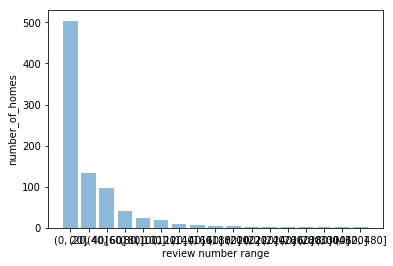

In [21]:
bar_chart(sample1_info_df, 'number_of_homes')

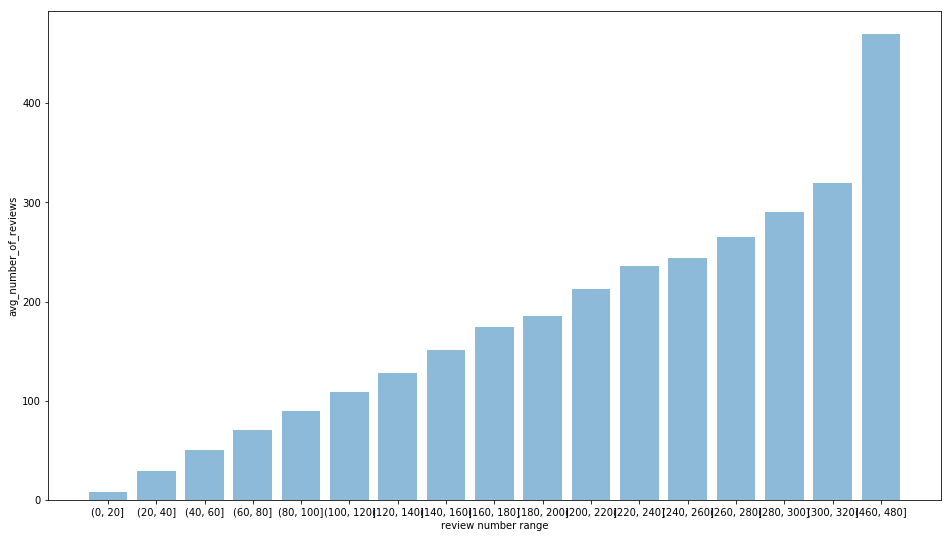

In [22]:
bar_chart(sample1_info_df, 'avg_number_of_reviews')

### For this phase of my paper, I will try homes with number_of_reviews in `(60, 120]` to see what will happen.

In [23]:
# Select data as described above.
data_sample2_df = data_sample1_df[data_sample1_df['number_of_reviews'] > 60]
data_sample2_df = data_sample2_df[data_sample2_df['number_of_reviews'] <= 120]

data_sample2_df.head()

,home_id,property_type,room_type,price,number_of_reviews,scores_overall_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,price_int
40,4218733,Apartment,Entire home/apt,$110.00,71,90.0,10.0,8.0,10.0,10.0,10.0,9.0,110
57,3269390,House,Entire home/apt,$95.00,77,98.0,10.0,10.0,10.0,10.0,10.0,10.0,95
61,2746782,Apartment,Entire home/apt,$90.00,109,97.0,10.0,10.0,10.0,10.0,9.0,10.0,90
66,3772674,Apartment,Entire home/apt,$85.00,65,98.0,10.0,10.0,10.0,10.0,10.0,10.0,85
92,4118282,House,Entire home/apt,$80.00,88,95.0,10.0,10.0,10.0,10.0,9.0,9.0,80


In [18]:
data_sample1_df.to_csv('./Data/sample_data_for_testing', sep='\t', encoding='utf-8')
# data_sample2_df.to_csv('./Data/sample_data_for_testing', sep='\t', encoding='utf-8')

In [19]:
data_sample1_df

,home_id,property_type,room_type,price,number_of_reviews,scores_overall_rating,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,price_int
0,241032,Apartment,Entire home/apt,$85.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,85
1,953595,Apartment,Entire home/apt,$150.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,150
5,5956968,House,Private room,$120.00,17,95.0,10.0,10.0,10.0,10.0,10.0,10.0,120
6,1909058,House,Private room,$80.00,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,80
7,856550,Cabin,Private room,$60.00,173,97.0,10.0,10.0,10.0,10.0,9.0,10.0,60
8,4948745,Apartment,Private room,$90.00,8,97.0,10.0,9.0,10.0,9.0,10.0,10.0,90
9,2493658,Apartment,Entire home/apt,$150.00,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,150
10,175576,House,Entire home/apt,$95.00,181,97.0,10.0,10.0,10.0,10.0,10.0,10.0,95
11,4454295,House,Entire home/apt,$99.00,8,97.0,10.0,10.0,9.0,10.0,10.0,9.0,99
15,8988178,House,Entire home/apt,$109.00,1,80.0,8.0,10.0,8.0,8.0,8.0,8.0,109


# Till now, the `data_sample2_df` will be used to do further analysis of reviews. See next notebook.